<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Regression Modeling: Simple Linear Regression

_Authors: Matt Brems (DC), Marc Harper (LA)_

---

<a id="learning-objectives"></a>
### Learning Objectives 
- Understand modeling, inference from models, and prediction
- Understand the framework of regression modeling
- Understand simple linear regression and linear relationships between variables
- Learn how to find the best slope and intercept for simple linear regression
- Be able to interpret the results of simple linear regression
- Understand the assumptions that simple linear regression makes

### Lesson Guide
- [Introduction: Modeling, Inference, and Prediction](#introduction-modeling-inference-and-prediction)
	- [Modeling](#modeling)
	- [Model-Based Inference](#model-based-inference)
	- [Prediction](#prediction)
- [Naive/Baseline Prediction](#naivebaseline-prediction)
	- [Let's Generate Some Data](#lets-generate-some-data)
- [Regression Modeling and Linear Relationships Between Variables](#regression-modeling-and-linear-relationships-between-variables)
- [Simple Linear Regression and Error](#simple-linear-regression-and-error)
	- [The Error Term $\epsilon$](#the-error-term-epsilon)
	- [Common Syntax for Linear Regression Models](#common-syntax-for-linear-regression-models)
- [Finding the "Best" Slope and Intercept](#finding-the-best-slope-and-intercept)
	- [Residuals](#residuals)
	- [Residual Sum of Squares (RSS)](#residual-sum-of-squares-rss)
	- [Minimizing the MSE](#minimizing-the-mse)
	- [Calculate Beta Coefficients by Hand](#calculate-beta-coefficients-by-hand)
- [Interpretation of SLR](#interpretation-of-slr)
- [Assumptions of SLR](#assumptions-of-slr)
- [Final Notes on Rinear Regression](#final-notes-on-linear-regression)
	- [Categorical Predictors](#categorical-predictors)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

<a id="introduction-modeling-inference-and-prediction"></a>
## Introduction: Modeling, Inference, and Prediction

---

<a id="modeling"></a>
### Modeling

Depending on how long you've lived in a particular place and traveled to a location for work, you probably have a good understanding of commute times in your area. For example, you've traveled to work (or GA!) using some combination of the Metro, buses, trains, Ubers, taxis, carpools, walking, etc.

**All humans naturally model the world around them.** 

Over time, your observations about transportation have built up a mental dataset and a mental model that helps you predict what traffic will be like at various times and locations. You probably use this mental model to help plan your days, predict arrival times, and many other tasks.
- As data scientists we attempt to make our understanding of relationships between different quantities more precise through using data and mathematical/statistical structures.
- This process is called modeling.
- Models are simplifications of reality that help us to better understand that which we observe.
- In a data science setting, models generally consist of an independent variable (or output) of interest and one or more dependent variables (or inputs) believed to have an effect on the independent variable.
- Linear regression is an extremely common and critically important modeling tool.


<a id="model-based-inference"></a>
### Model-Based Inference

- We can use models to conduct inference.
- Given a model, we can better understand relationships between an independent variable and the dependent variable or between multiple independent variables.
- _"The most that can be expected from any model is that it can supply a useful approximation to reality: All models are wrong; some models are useful." - George Box_

**What are some examples of where inference from a mental model would be valuable in your job?**

In [2]:
# A:

<a id="prediction"></a>
### Prediction

- We can use a model to make predictions, or to estimate an dependent variable's value given at least one independent variable's value.
- Predictions can be valuable even if they are not exactly right.
- Good predictions are extremely valuable for a wide variety of purposes.

**What are some examples of where prediction from a mental model could be valuable?**

In [3]:
# A:

**What is the difference between model prediction and inference?**

In [4]:
# A:

<a id="naivebaseline-prediction"></a>
## Naive/Baseline Prediction

What is the best prediction we can make for any data point if we can only use a single value?

How can we measure the success of our prediction?

<a id="lets-generate-some-data"></a>
### Let's Generate Some Data

In [2]:
# create an x and a y that is 
# 50 plus 2 times x with some random noise around that
x = np.linspace(-5, 50, 100)
# x is our independent value
y = 50 + 2 * x  + np.random.normal(0, 20, size=len(x))
# y is our dependent value because the value of x affects it

In [3]:
df = pd.DataFrame({'X': x, 'Y': y})
df.head()

,X,Y
0,-5.000000,4.936271
1,-4.444444,19.352788
2,-3.888889,21.727345
3,-3.333333,14.897567
4,-2.777778,52.121809


If we know very little about our data and can only use a single value, we can still predict the mean.

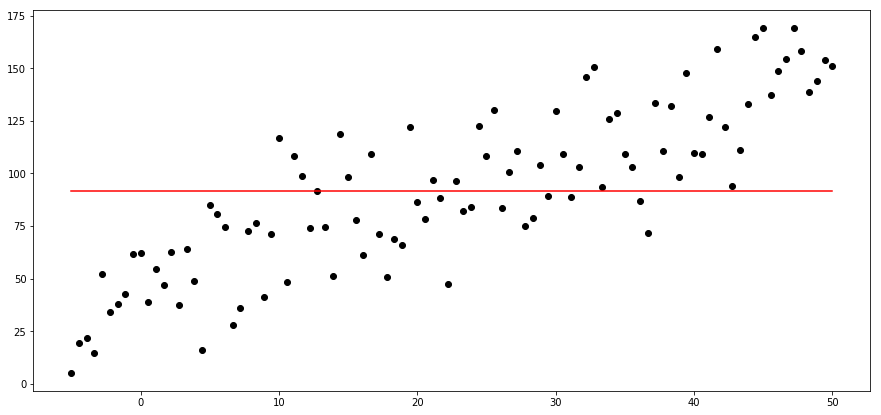

In [4]:
### Plot the data
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x, y, c='k')
ax.plot((df['X'].min(), df['X'].max()),(np.mean(df['Y']), np.mean(df['Y'])), color='r');

We'll add that prediction to our DataFrame to use later

In [5]:
# utilize the mean Y as our prediction of Y
df['Mean_Yhat'] = df['Y'].mean()
# if we were given a new X value/observation, this would predict its Y
# using the mean of known Ys and there for be said mean.

<a id="regression-modeling-and-linear-relationships-between-variables"></a>
##  Regression Modeling and Linear Relationships Between Variables

---

You may have previously learned about a linear relationship between some variable $X$ and another **continuous** variable $Y$, where you used the phrase "Y equals m X plus b" to describe this relationship.

### $$ Y = mX + b$$

In this case, we don't know anything (yet!) about the relationship between $X$ and $Y$. If we decided to plot the relationship between these variables on a graph, we wouldn't know where to start because we don't know how $X$ and $Y$ are related. (Another way of saying this is that we don't know $m$ or $b$.)

The line we want to plot for $Y$ as a function of $X$ is parameterized by its slope $m$ and "Y-intercept" $b$.

**The term "regression modeling" implies that the target variable (also known as the "dependent" variable and many other names) is a CONTINUOUS random variable.**

**What are some examples of continous random variables?**

In [6]:
# A:

**What are some examples of random variables that are not continuous?**

In [7]:
# A:

**The slope**

In the equation $Y = mX + b$, $m$ is the slope. Its value indicates that, if $X$ were to increase by 1 unit, then $Y$ will increase by exactly $m$ units.

> *Warning: This is exact only if we know that $X$ and $Y$ have exactly a linear relationship. In almost all linear regression applications, this will not be exact!*

**The intercept**

In the equation $Y = mX + b$, $b$ is the Y-intercept. Its value indicates that, if $X$ equals 0, then Y is exactly equal to $b$ units. 

> *Warning: This is exact only if we know that $X$ and $Y$ have exactly a linear relationship. In almost all linear regression applications, this will not be exact!*

_Exact Linear Relations have one independent variable($X$) that affects the dependent variable($Y$).  You will most likely never work with an exact linear relation and will instead work with relations with multiple independent variables, i.e. $Y = m_1X_1+m_2X_2+...+m_nX_n + b$_

**Suppose my commute time to GA includes exactly ten minutes of walking plus exactly three minutes for every Metro stop.**
- What is the value of the slope?
- What is the value of the Y-intercept?
- What is the equation of the line?
- Give an example of using this line for prediction.
- Give an example of using this line for inference.

In [11]:
# A:

This is useful, but we're relying on the idea of *exactly*. The relationship between X and Y must be exactly linear – a perfect correspondence or functional relationship.

Put another way, *we currently believe there to be exactly zero measurement error or any other error in our line.*

Furthermore, this scenario assumed that we knew the true commute times for our model. This is probably not realistic; in most cases we'll gather data and then try to build a model from the data - not the other way around.

<a id="simple-linear-regression-and-error"></a>
## Simple Linear Regression and Error

---

In simple linear regression (SLR), we model the inexact linear relationship between a single $X$ and $Y$ variable.

- We derive the slope and intercept from the data that we have to "best fit" the data (more on this later).
- We no longer require the relationship between X and Y to be exactly linear. It is assumed there will be some degree of *error* in our estimation.
- We understand and accept that errors in our data collection process and in the data itself will exist.

<a id="the-error-term-epsilon"></a>
### The error term $\epsilon$

Recall the previous formula for the linear relationship between $X$ and $Y$:

### $$ Y = mX + b $$

We now add a term for the *error*, denoted $\epsilon$:

### $$ Y = mX + b + \epsilon $$

**By adding a term for error, we are accounting for the fact that there may not be an exact function of $Y$ given $X$, $m$, and $b$.**

<a id="common-syntax-for-linear-regression-models"></a>
### Common syntax for linear regression models

Below are a handful of common ways to write out linear regression models. **They are all equivalent in meaning.**

### $$ Y = mX + b + \epsilon \\
Y = b_1 X + b_0 + \epsilon \\
Y = \alpha + \beta X + \epsilon\\
Y = \beta_0 + \beta_1 X + \epsilon$$

Going forward we will be using $\beta_0$ to indicate the intercept and $\beta_1$ to indicate the slope or "weight".

<a id="finding-the-best-slope-and-intercept"></a>
## Finding the "best" slope and intercept

---

**1. If we want to find the "best" slope or intercept, we will need a criterion that defines what it means to be the "best".**

**2. We need to be able to numerically optimize (maximize or minimize) this criterion.**


<a id="residuals"></a>
### Residuals

The difference between the true value of $Y$ and the predicted value of $Y$ (denoted $\hat{Y}$, "Y-hat") is known as a "residual." For every value of $\hat{Y}_i$, there is an accompanying residual $\epsilon_i$.

**Note that the residual $\epsilon_i$ is the same as the error in our modeled linear relationship!**


<a id="residual-sum-of-squares-rss"></a>
### Residual sum of squares (RSS)

The most common way to define the "best fit line" is one that forces the ensures our residuals (a.k.a. errors) will be as close to zero as possible.

In fact, we seek to minimize the *sum of squared residuals* or [residual sum of squares (RSS)](http://www.statisticshowto.com/residual-sum-squares/). This minimizes the [mean squared error (MSE) or sum of squares of error (SSE)](http://www.statisticshowto.com/mean-squared-error/).



### $$RSS = \sum_{i=1}^n (Y_i - \hat{Y}_i)^2 $$

This is also known as a **loss function**, where the "loss" here is the sum of squared residuals.

---

**Review: what is the difference between a parameter and a statistic?**

Below are two equations, one using parameters and one using statistics. What is the difference?

### $$ Y = \beta_0 + \beta_1 X \\
\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X $$

In [12]:
# A:

Remember our naive prediction? Let's see how it does.

In [8]:
# Calculate MSE
df['Mean_Yhat_SE'] = np.square(df['Y'] - df['Mean_Yhat'])
df['Mean_Yhat_SE'].mean()

1539.362747824864

<a id="minimizing-the-mse"></a>
### Minimizing the MSE

For simple linear regression we can derive the intercept and slope that minimize the RSS algebraically. 

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$
- $s_Y$ : the sample standard deviation of observed values $Y$
- $s_X$ : the sample standard deviation of observed values $X$
- $r_{XY}$ : the sample Pearson correlation coefficient between observed $X$ and $Y$

The equations for the intercept and slope that minimize the RSS is:

### $$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} \\
\hat{\beta}_1 = r_{XY} \frac{s_Y}{x_X}$$

Our simple linear regression is an **estimator of the expected value (mean) of $Y$**.

> **Note:** Estimators are mathematical functions or formulas that yield an *estimate*. For example, an estimator might be the sample mean whereas the estimate is the value of the sample mean from our data set.

<a id="calculate-beta-coefficients-by-hand"></a>
### Calculate Beta Coefficients by Hand

In [12]:
y_bar = df['Y'].mean()
x_bar = df['X'].mean()
std_y = df['Y'].std()
std_x = df['X'].std()
# evaluates linear relation between values in X and Y(Pearson correlation)
r_xy = df.corr().loc['X','Y']
# calculate optimal slope 
beta_1 = r_xy*(std_y/std_x)
# calculate optinal y intercept
beta_0 = y_bar - beta_1*x_bar

In [13]:
# predict y_hat using or optimized slope and y-intercept
df['Linear_Yhat'] = beta_0 + beta_1*df['X']

In [14]:
np.square(df['Y'] - df['Linear_Yhat']).mean()

443.452970166879

**How does our new MSE compare to our old MSE?**

In [17]:
# A:

#### We can now plot our line

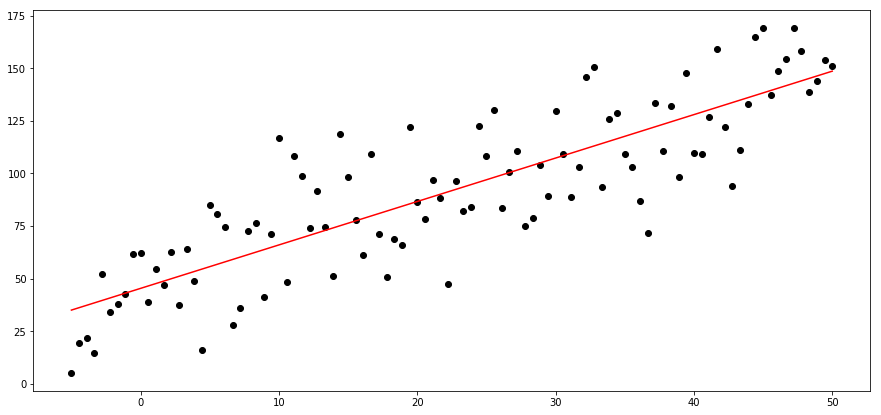

In [15]:
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x, y, c='k')
ax.plot(df['X'], df['Linear_Yhat'], color='r');

#### We can also plot our residuals

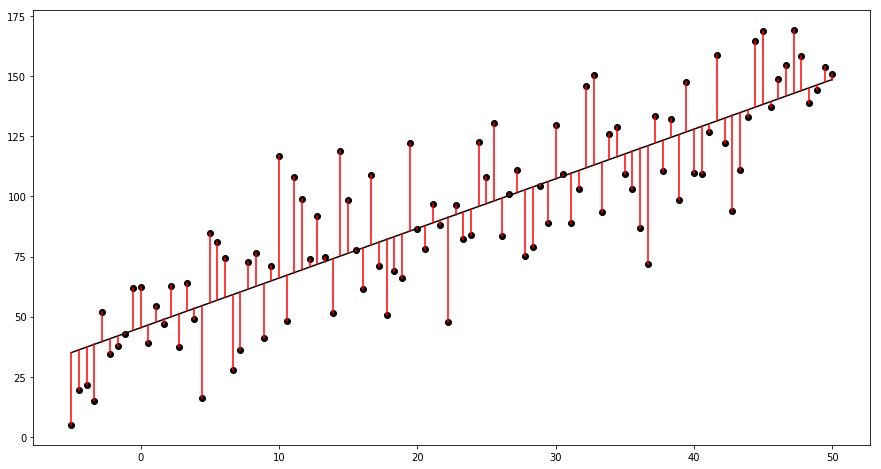

In [16]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=df['X'], y=df['Y'], c='k')
ax.plot(df['X'], df['Linear_Yhat'], color='k');

# iterate over predictions
for _, row in df.iterrows():
    plt.plot((row['X'], row['X']), (row['Y'], row['Linear_Yhat']), 'r-')

_**Recomended**: Go back and plot the residuals of our estimate that used the mean of $Y$_

<a id="interpretation-of-slr"></a>
## Interpretation of SLR

---

The simple linear regression estimators described above have really nice properties:

1. They are unbiased. (a.k.a. the statistics will on average equal the true parameter value)
2. Among all unbiased estimators, the estimators above have the smallest possible variance.
3. They are consistent. (a.k.a. as your sample size n goes to infinity, the statistic converges to the true parameter value)

**However, these are just mathematical properties.** They do not take into account real-world situations. For example, suppose I want to use a SLR model to predict my commute time and I get the model:

    [commute time] = 8 * [number of Metro stops] - 10

In this case, my commute time is estimated to be negative if I go zero stops or one stop on the Metro. If I were to interpret my intercept, I might say "If I travel zero Metro stops on my way to work, I expect to commute -10 minutes." Of course, this is nonsense; you can't have a negative commute time!

**What this means:** 

When building a model, make sure your model makes sense! You are responsible for the interpretation of the model. All the computer will do is optimize. You may not do anything wrong when you fit a model, but make a note that there are  shortcomings to the framework.

<a id='assumptions'></a>

<a id="assumptions-of-slr"></a>
## Assumptions of SLR

---

There are some critical assumptions involved in SLR that you must be aware of:

1. **Linearity:** Y and X must have an approximately linear relationship.
2. **Independence:** Errors (residuals) $\epsilon_i$ and $\epsilon_j$ must be independent of one another for any i != j.
3. **Normality:** The errors (residuals) follow a Normal distribution.
4. **Equality of Variances** (Homoscedasticity of errors): The errors (residuals) should have a roughly consistent pattern, regardless of the value of X. (There should be no discernable relationship between X and the residuals.)

The mnemonic **LINE** is a useful way to remember these four assumptions.

Lengthier discussions of the four main assumptions and how one can evaluate or test for each of these [can be found here](http://people.duke.edu/~rnau/testing.htm).

If all four assumptions are true, the following holds: 

### $$ Y_i \text{ ~ } N(\beta_0 + \beta_1 X_i, \sigma) $$

<a id="final-notes-on-linear-regression"></a>
## Final Notes on Linear Regression

---

The term "linear" here means linear in the coefficient. That means that we expect $Y$ to change by a constant amount for a constant change in $X$. A linear regression model could include $X^2$, $X^3$, $log(X)$, etc. as long as the coefficient is linear! (This might be a bit confusing, but imagine that instead of squaring $X$, we created a new column called 'Z' that was equal to $X^2$.)

<a id="categorical-predictors"></a>
### Categorical predictors

You may note that in our examples so far our independent variable $X$ is quantitative. This need not be the case. In many cases, we'll use qualitative variables to explain quantitative outcomes. Some examples:

- One's sex and race are often linked to income.
- The day of the week might explain a bar's profits or the month of the year might affect an airlines' revenues.
- Whether or not someone has children under 5 might help to predict the number of days missed by that employee.

If you have variable that is categorical, you will need to "dummy code" it:
- Check out [a worked out example](http://chrisalbon.com/python/pandas_convert_categorical_to_dummies.html) 
- and/or [the Pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.get_dummies.html) to see this implemented in Python.

Practically, dummy variables come into play more in **multiple linear regression** (MLR), but it can technically apply to SLR and it's something of which you should be aware of.